## はんなりPython #9

# 今日はみんなでスクレイピングしてみましょう！

* ライブラリ：　requests, BeautifulSoup4, Pandas, time
* とりあえずいろいろやってみましょう

# 1.まずはAPIを使ってみましょう！
* 色々なテクニックを使ってデータを取得する前に、APIを探してみましょう。     
* もしAPIがあるなら、そこから簡単にデータが取れ、苦労する必要はありません。     
* まずは<span style='color: red; font-size: 20px;'>ライブラリrequests</span>を使って、仮想通貨取引所zaifのapiを使ってみます。     
* requestsのサイト(quickstart): http://docs.python-requests.org/en/master/user/quickstart/
* zaifのAPIのサイト: https://corp.zaif.jp/api-docs/　       


In [1]:
# まずはライブラリをインポートします
import requests
# APIを叩きます
r = requests.get('https://api.zaif.jp/api/1/last_price/btc_jpy')
# APIからの反応を見ます
r.status_code

200

## HTTPステータスコード
* wikipedia https://ja.wikipedia.org/wiki/HTTP%E3%82%B9%E3%83%86%E3%83%BC%E3%82%BF%E3%82%B9%E3%82%B3%E3%83%BC%E3%83%89      
* 2xxなら成功です！！！

In [2]:
# とりあえず中身を見る場合textを！！！！
r.text

'{"last_price": 711440.0}'

In [3]:
r.headers['content-type']

'application/json'

In [4]:
r.json()

{'last_price': 711440.0}

In [5]:
# 価格データだけを取る
r.json()['last_price']

711440.0

In [6]:
# 一秒おきにデータを取ってリストに入れる

import time

price = []
for t in range(10):
    r = requests.get('https://api.zaif.jp/api/1/last_price/btc_jpy')
    price.append(r.json()['last_price'])
    time.sleep(1)

In [7]:
print(price)

[711440.0, 711440.0, 711500.0, 711435.0, 711445.0, 711455.0, 711455.0, 711455.0, 711460.0, 711460.0]


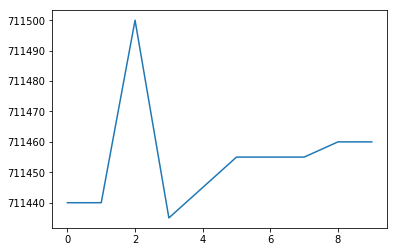

In [8]:
import pandas as pd
%matplotlib inline
pd.Series(price).plot()

## 課題１
### zaifのAPIを使って、btc_jpyのtickerのデータを取ってみましょう。     
https://corp.zaif.jp/api-docs/　
### 取れたら"volume"のデータを抜き出しましょう。     
### 次に何秒間かのデータを作り、グラフを作ってみましょう！

# 2.WEBサイトからデータを取る
### APIがない場合はWEBサイトからデータを集めないといけなくなります
### 今回は日経新聞のウェブから日本の10年金利とそのサイトへのリンクを取ります。

In [9]:
from bs4 import BeautifulSoup

In [10]:
# 適当なサイトから目標とする値を取ってみる
r = requests.get('https://www.nikkei.com/')

bsobj = BeautifulSoup(r.text, 'lxml')
# パーサーの話： https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser

## これでウェブページの全体が読み込まれました！

## 次に取りたい場所をクロームで調べましょう！      
* やり方　==>  取りたい場所を右クリック　==>  検証を押す
* それで取りたいデータのタグや属性を調べます。    
* それを指定してほしいデータを取ります。

In [11]:
bsobj.find('div', {'class':'m-miH01C_cell m-miH01C_cell_col5'})

<div class="m-miH01C_cell m-miH01C_cell_col5" data-id="JSID_JpnIndex"><a href="/markets/worldidx/chart/nk225/" title="9/7 15:15 大引"><span class="m-miH01C_exchange">日経平均</span><span class="m-miH01C_rate">22,307.06</span><span class="m-miH01C_comparison minus">-180.88</span></a></div>

In [12]:
bsobj.findAll('div', {'class':'m-miH01C_cell m-miH01C_cell_col5'})

[<div class="m-miH01C_cell m-miH01C_cell_col5" data-id="JSID_JpnIndex"><a href="/markets/worldidx/chart/nk225/" title="9/7 15:15 大引"><span class="m-miH01C_exchange">日経平均</span><span class="m-miH01C_rate">22,307.06</span><span class="m-miH01C_comparison minus">-180.88</span></a></div>,
 <div class="m-miH01C_cell m-miH01C_cell_col5" data-id="JSID_DowJones"><a href="/markets/kaigai/" title="9/7 17:20 終値"><span class="m-miH01C_exchange">NYダウ</span><span class="m-miH01C_rate">25,916.54</span><span class="m-miH01C_comparison minus">-79.33</span></a></div>,
 <div class="m-miH01C_cell m-miH01C_cell_col5" data-id="JSID_YenDollarExchange"><a href="/markets/kawase/" title="9/8 5:49"><span class="m-miH01C_exchange">ドル円</span><span class="m-miH01C_rate">111.03-04</span><span class="m-miH01C_comparison minus">-0.28</span></a></div>,
 <div class="m-miH01C_cell m-miH01C_cell_col5" data-id="JSID_NYCrudeOilRate"><a href="/markets/shohin/" title="9/7 16:59"><span class="m-miH01C_exchange">NY原油</span><spa

In [13]:
bsobj.findAll('div', {'class':'m-miH01C_cell m-miH01C_cell_col5'})[4].a['href']

'/markets/kawase/page/?uah=DF_SEC8_C3_150'

In [14]:
bond_url='https://www.nikkei.com/' + bsobj.findAll('div', {'class':'m-miH01C_cell'})[4].a['href']
print(bond_url)

https://www.nikkei.com//markets/kawase/page/?uah=DF_SEC8_C3_150


<span style='color:red; font-size: 25px;'> spanが二つある場合、後ろにあるものをどうやって取るか分からなかったのでセレクターを変えて取った。2つ目を取る方法はあるか？</span>

In [15]:
bsobj.findAll('div', {'class':'m-miH01C_cell m-miH01C_cell_col5'})[4].span

<span class="m-miH01C_exchange">長期金利</span>

In [16]:
bsobj.findAll('div', {'class':'m-miH01C_cell m-miH01C_cell_col5'})[4]

<div class="m-miH01C_cell m-miH01C_cell_col5" data-id="JSID_JPNLongTermInterestRate"><a href="/markets/kawase/page/?uah=DF_SEC8_C3_150" title="9/7 14:36"><span class="m-miH01C_exchange">長期金利</span><span class="m-miH01C_rate">0.105</span><span class="m-miH01C_comparison stay">±0.000</span></a></div>

In [17]:
bsobj.findAll('span', {'class':'m-miH01C_rate'})[4].get_text()

'0.105'

## 課題2

#### 日経新聞のアクセスランキングのサイトから総合ランキングトップ10のニュースタイトル、ニュースのリンク、ニュースの日時を取りましょう。     
https://www.nikkei.com/access/
#### それを辞書に記録してみましょう。
